In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx

In [2]:
def my_draw_networkx_edge_labels(
    G,
    pos,
    edge_labels=None,
    label_pos=0.5,
    font_size=10,
    font_color="k",
    font_family="sans-serif",
    font_weight="normal",
    alpha=None,
    bbox=None,
    horizontalalignment="center",
    verticalalignment="center",
    ax=None,
    rotate=True,
    clip_on=True,
    rad=0
):
    """Draw edge labels.

    Parameters
    ----------
    G : graph
        A networkx graph

    pos : dictionary
        A dictionary with nodes as keys and positions as values.
        Positions should be sequences of length 2.

    edge_labels : dictionary (default={})
        Edge labels in a dictionary of labels keyed by edge two-tuple.
        Only labels for the keys in the dictionary are drawn.

    label_pos : float (default=0.5)
        Position of edge label along edge (0=head, 0.5=center, 1=tail)

    font_size : int (default=10)
        Font size for text labels

    font_color : string (default='k' black)
        Font color string

    font_weight : string (default='normal')
        Font weight

    font_family : string (default='sans-serif')
        Font family

    alpha : float or None (default=None)
        The text transparency

    bbox : Matplotlib bbox, optional
        Specify text box properties (e.g. shape, color etc.) for edge labels.
        Default is {boxstyle='round', ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0)}.

    horizontalalignment : string (default='center')
        Horizontal alignment {'center', 'right', 'left'}

    verticalalignment : string (default='center')
        Vertical alignment {'center', 'top', 'bottom', 'baseline', 'center_baseline'}

    ax : Matplotlib Axes object, optional
        Draw the graph in the specified Matplotlib axes.

    rotate : bool (deafult=True)
        Rotate edge labels to lie parallel to edges

    clip_on : bool (default=True)
        Turn on clipping of edge labels at axis boundaries

    Returns
    -------
    dict
        `dict` of labels keyed by edge

    Examples
    --------
    >>> G = nx.dodecahedral_graph()
    >>> edge_labels = nx.draw_networkx_edge_labels(G, pos=nx.spring_layout(G))

    Also see the NetworkX drawing examples at
    https://networkx.org/documentation/latest/auto_examples/index.html

    See Also
    --------
    draw
    draw_networkx
    draw_networkx_nodes
    draw_networkx_edges
    draw_networkx_labels
    """
    import matplotlib.pyplot as plt
    import numpy as np

    if ax is None:
        ax = plt.gca()
    if edge_labels is None:
        labels = {(u, v): d for u, v, d in G.edges(data=True)}
    else:
        labels = edge_labels
    text_items = {}
    for (n1, n2), label in labels.items():
        (x1, y1) = pos[n1]
        (x2, y2) = pos[n2]
        (x, y) = (
            x1 * label_pos + x2 * (1.0 - label_pos),
            y1 * label_pos + y2 * (1.0 - label_pos),
        )
        pos_1 = ax.transData.transform(np.array(pos[n1]))
        pos_2 = ax.transData.transform(np.array(pos[n2]))
        linear_mid = 0.5*pos_1 + 0.5*pos_2
        d_pos = pos_2 - pos_1
        rotation_matrix = np.array([(0,1), (-1,0)])
        ctrl_1 = linear_mid + rad*rotation_matrix@d_pos
        ctrl_mid_1 = 0.5*pos_1 + 0.5*ctrl_1
        ctrl_mid_2 = 0.5*pos_2 + 0.5*ctrl_1
        bezier_mid = 0.5*ctrl_mid_1 + 0.5*ctrl_mid_2
        (x, y) = ax.transData.inverted().transform(bezier_mid)

        if rotate:
            # in degrees
            angle = np.arctan2(y2 - y1, x2 - x1) / (2.0 * np.pi) * 360
            # make label orientation "right-side-up"
            if angle > 90:
                angle -= 180
            if angle < -90:
                angle += 180
            # transform data coordinate angle to screen coordinate angle
            xy = np.array((x, y))
            trans_angle = ax.transData.transform_angles(
                np.array((angle,)), xy.reshape((1, 2))
            )[0]
        else:
            trans_angle = 0.0
        # use default box of white with white border
        if bbox is None:
            bbox = dict(boxstyle="round", ec=(1.0, 1.0, 1.0), fc=(1.0, 1.0, 1.0))
        if not isinstance(label, str):
            label = str(label)  # this makes "1" and 1 labeled the same

        t = ax.text(
            x,
            y,
            label,
            size=font_size,
            color=font_color,
            family=font_family,
            weight=font_weight,
            alpha=alpha,
            horizontalalignment=horizontalalignment,
            verticalalignment=verticalalignment,
            rotation=trans_angle,
            transform=ax.transData,
            bbox=bbox,
            zorder=1,
            clip_on=clip_on,
        )
        text_items[(n1, n2)] = t

    ax.tick_params(
        axis="both",
        which="both",
        bottom=False,
        left=False,
        labelbottom=False,
        labelleft=False,
    )

    return text_items

(0, 1), {'d': 9}
(0, 2), {'d': 4}
(0, 3), {'d': 2}
(0, 4), {'d': 6}
(1, 2), {'d': 10}
(1, 3), {'d': 4}
(1, 4), {'d': 10}
(2, 3), {'d': 3}
(2, 4), {'d': 9}
(3, 4), {'d': 6}


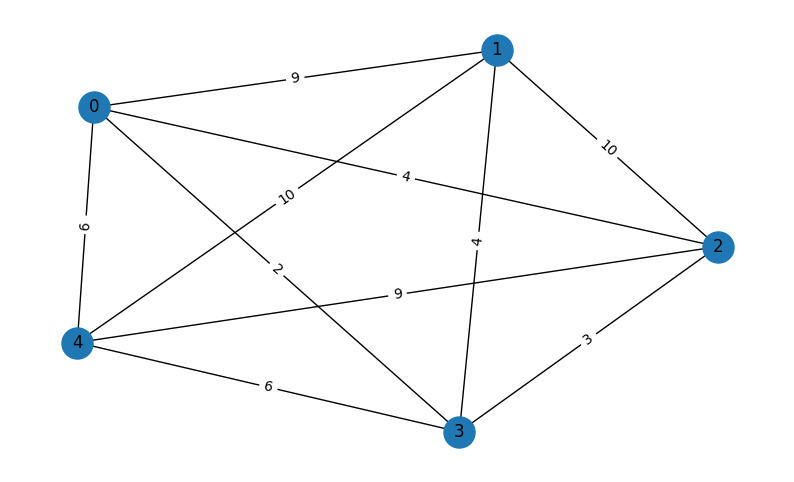

In [158]:
plt.figure(figsize=(10,6))
## inherit graph
G1 = nx.Graph(nx.complete_graph(n=5))
## update edge d
for e in G1.edges():
    G1[e[0]][e[1]]['d'] = np.random.randint(1,11)
    print(f'{e}, {G1[e[0]][e[1]]}')
## Need to create a layout when doing 
## separate calls to draw nodes and edges
pos = nx.spring_layout(G1, seed=7) ## seed=7
## draw nodes
nx.draw_networkx_nodes(G1, pos, node_size = 500)
## draw node labels
nx.draw_networkx_labels(G1, pos)
## draw edges
arc_rad = 0.1
# edge_list = [(u, v) for (u, v, d) in G1.edges(data=True)]
edge_list = [edge for edge in G1.edges(data=True)]
nx.draw_networkx_edges(G1, pos, edgelist = edge_list)
# edge distance labels
edge_labels = nx.get_edge_attributes(G1, "d")
nx.draw_networkx_edge_labels(G1, pos, edge_labels = edge_labels)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [171]:
nx.write_gml(G1, "./dataset/complete_graph_undirected.gml")
# mygraph = nx.read_gml("path.to.file")

(0, 1), {'d': 4}
(0, 2), {'d': 9}
(0, 3), {'d': 7}
(0, 4), {'d': 6}
(1, 0), {'d': 7}
(1, 2), {'d': 3}
(1, 3), {'d': 5}
(1, 4), {'d': 1}
(2, 0), {'d': 7}
(2, 1), {'d': 5}
(2, 3), {'d': 9}
(2, 4), {'d': 8}
(3, 0), {'d': 9}
(3, 1), {'d': 3}
(3, 2), {'d': 4}
(3, 4), {'d': 1}
(4, 0), {'d': 5}
(4, 1), {'d': 5}
(4, 2), {'d': 3}
(4, 3), {'d': 8}


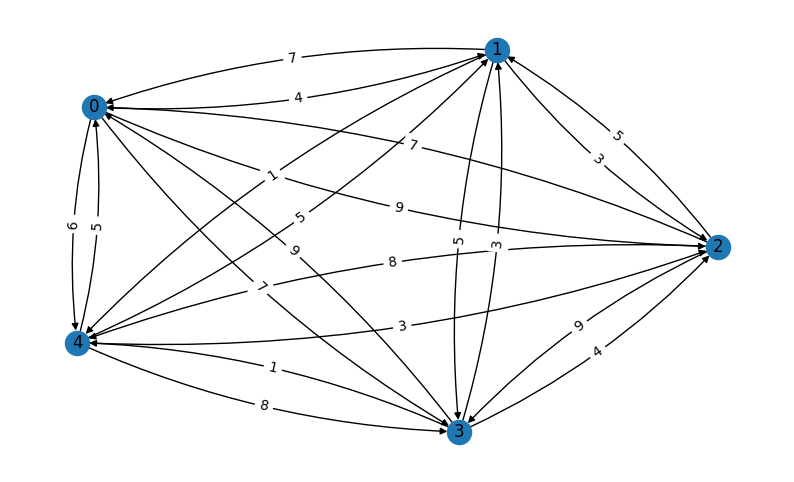

In [174]:
plt.figure(figsize=(10,6))
## inherit graph
example_tsp_undirected = nx.DiGraph(nx.complete_graph(n=5))
## update edge distance
for e in example_tsp_undirected.edges():
    G2[e[0]][e[1]]['d'] = np.random.randint(1,11)
    print(f'{e}, {G2[e[0]][e[1]]}')
## Need to create a layout when doing 
## separate calls to draw nodes and edges
pos = nx.spring_layout(G2, seed=7) ## seed=7
## draw nodes
nx.draw_networkx_nodes(G2, pos, node_size = 300)
## draw node labels
nx.draw_networkx_labels(G2, pos)
## draw edges
arc_rad = 0.1
# edge_list = [(u, v) for (u, v, d) in G2.edges(data=True)]
straight_edges = [edge for edge in G2.edges() if reversed(edge) not in G2.edges()] # straight_edges = list(set(G2.edges()) - set(curved_edges))
curved_edges = [edge for edge in G2.edges() if reversed(edge) in G2.edges()]
nx.draw_networkx_edges(G2, pos, edgelist = straight_edges)
nx.draw_networkx_edges(G2, pos, edgelist = curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')
# edge distance labels
edge_labels = nx.get_edge_attributes(G2, "d")
straight_edge_labels = {edge: edge_labels[edge] for edge in straight_edges}
curved_edge_labels = {edge: edge_labels[edge] for edge in curved_edges}
nx.draw_networkx_edge_labels(G2, pos, edge_labels = straight_edge_labels)
# nx.draw_networkx_edge_labels(G2, pos, edge_labels = curved_edge_labels, label_pos=0.7)
my_draw_networkx_edge_labels(G2, pos, edge_labels = curved_edge_labels, rad = arc_rad)
# nx.draw_networkx_edge_labels(G2, pos, edge_labels = edge_labels, label_pos=0.3, font_size=7)

for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [172]:
# nx.write_gml(G2, "./dataset/complete_graph_directed.gml")

https://stackoverflow.com/questions/22785849/drawing-multiple-edges-between-two-nodes-with-networkx

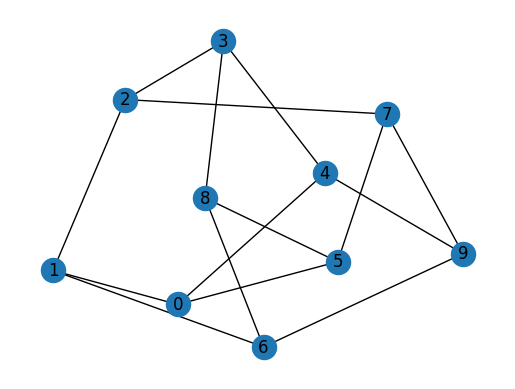

In [4]:
petersen_graph = nx.petersen_graph()
nx.draw_networkx(petersen_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

**The Tutte graph** is a cubic polyhedral, non-Hamiltonian graph. It has 46 nodes and 69 edges. It is a counterexample to Tait’s conjecture that every 3-regular polyhedron has a Hamiltonian cycle. It can be realized geometrically from a tetrahedron by multiply truncating three of its vertices.

**Đồ thị Tutte** là một đồ thị đa diện lập phương, phi Hamilton. Nó có 46 nút và 69 cạnh. Nó là một phản ví dụ đối với phỏng đoán của Tait rằng mọi đa diện 3 cạnh đều có một chu trình Hamilton. Nó có thể được nhận ra về mặt hình học từ một tứ diện bằng cách nhân ba đỉnh của nó bị cắt bớt.

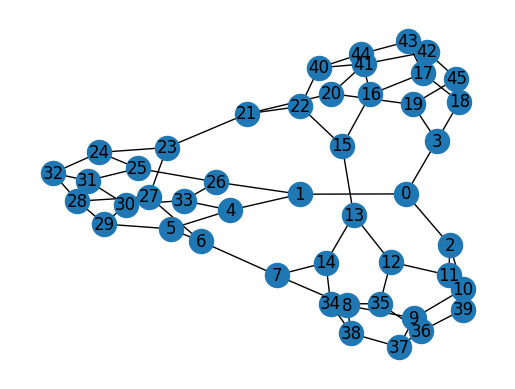

In [ ]:
tutte_graph = nx.tutte_graph()
nx.draw_networkx(tutte_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

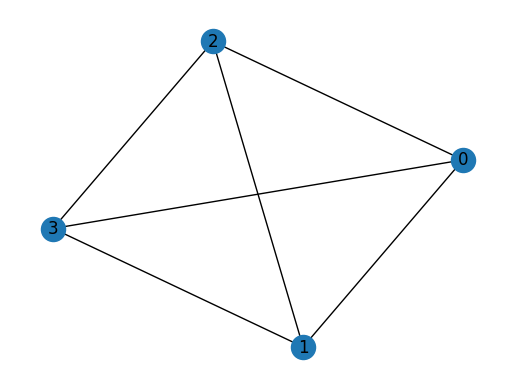

In [6]:
tetrahedral_graph = nx.tetrahedral_graph()
nx.draw_networkx(tetrahedral_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

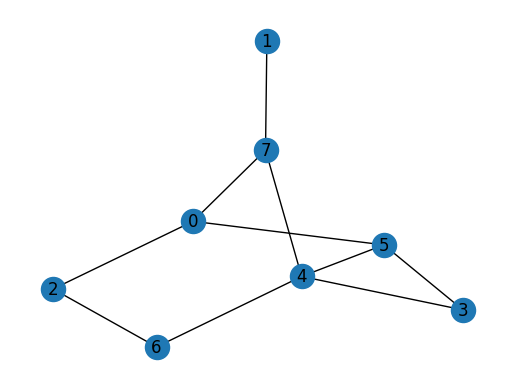

In [7]:
sedgewick_maze_graph = nx.sedgewick_maze_graph()
nx.draw_networkx(sedgewick_maze_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

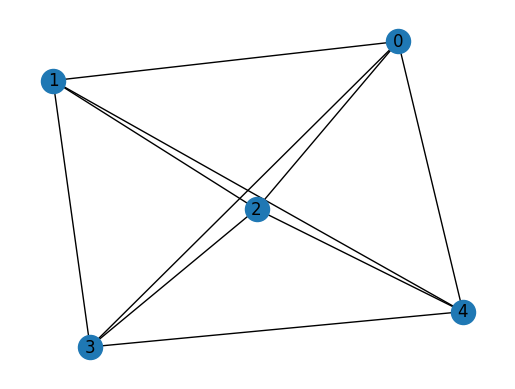

In [8]:
complete_graph = nx.complete_graph(n = 5)
nx.draw_networkx(complete_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

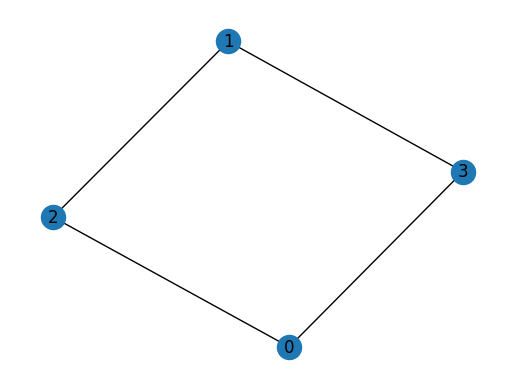

In [9]:
complete_bipartite_graph = nx.complete_bipartite_graph(n1 = 2, n2 = 2)
nx.draw_networkx(complete_bipartite_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

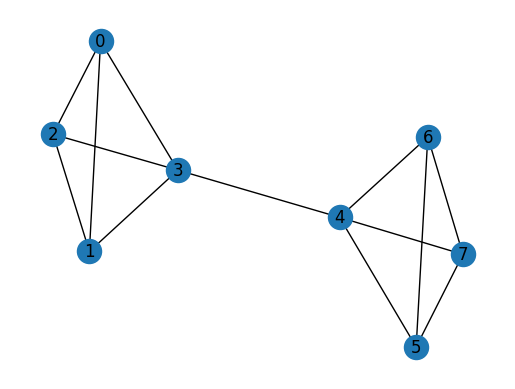

In [19]:
barbell_graph = nx.barbell_graph(m1 = 4, m2 = 0)
# barbell_graph.to_directed(as_view = True)
nx.draw_networkx(barbell_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

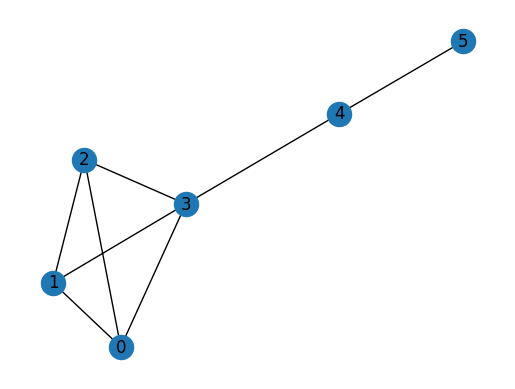

In [11]:
lollipop_graph = nx.lollipop_graph(m = 4, n = 2)
nx.draw_networkx(lollipop_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

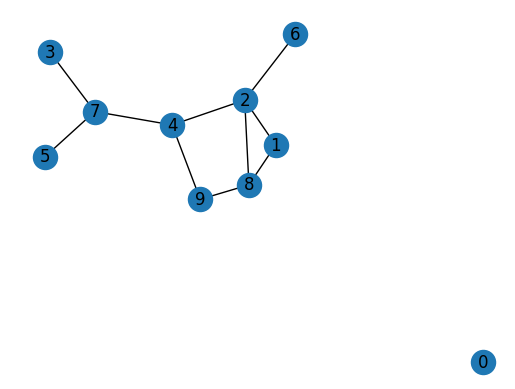

In [12]:
erdos_renyi_graph = nx.erdos_renyi_graph(n = 10, p = 0.18)
nx.draw_networkx(erdos_renyi_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

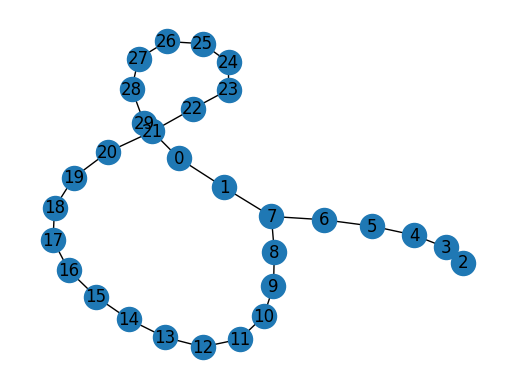

In [13]:
watts_strogatz_graph = nx.watts_strogatz_graph(30, 3, 0.1)
nx.draw_networkx(watts_strogatz_graph, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

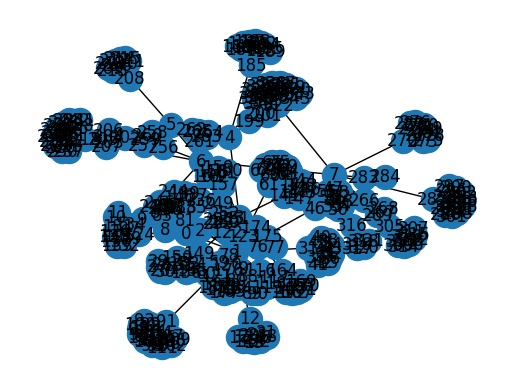

In [165]:
random_lobster = nx.random_lobster(10, 0.9, 0.9)
nx.draw_networkx(random_lobster, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [ ]:
random_lobster = nx.random_lobster(10, 0.9, 0.9)
nx.draw_networkx(random_lobster, with_labels=True)
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.tick_params(axis='y', which='both', right=False, left=False, labelleft=False)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

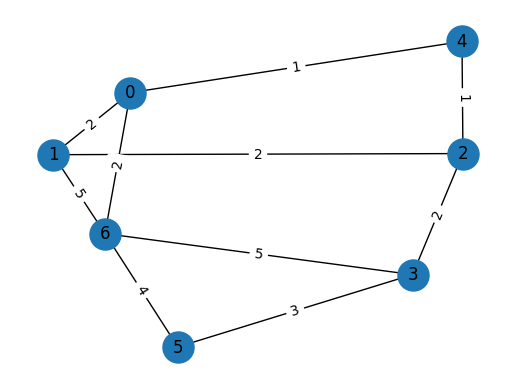

In [3]:
example_tsp_undirected = nx.Graph()
example_tsp_undirected.add_edges_from([
    (0,1,{'d':2}),
    (0,4,{'d':1}),
    (0,6,{'d':2}),
    (1,2,{'d':2}),
    (1,6,{'d':5}),
    (2,3,{'d':2}),
    (2,4,{'d':1}),
    (3,5,{'d':3}),
    (3,6,{'d':5}),
    (5,6,{'d':4})
])
## Need to create a layout when doing 
## separate calls to draw nodes and edges
pos = nx.spring_layout(example_tsp_undirected, seed=7) ## seed=7
## draw nodes
nx.draw_networkx_nodes(example_tsp_undirected, pos, node_size = 500)
## draw node labels
nx.draw_networkx_labels(example_tsp_undirected, pos)
## draw edges
arc_rad = 0.1
# edge_list = [(u, v) for (u, v, d) in example_tsp_undirected.edges(data=True)]
edge_list = [edge for edge in example_tsp_undirected.edges(data=True)]
nx.draw_networkx_edges(example_tsp_undirected, pos, edgelist = edge_list)
# edge distance labels
edge_labels = nx.get_edge_attributes(example_tsp_undirected, "d")
nx.draw_networkx_edge_labels(example_tsp_undirected, pos, edge_labels = edge_labels)
for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()


In [9]:
# nx.write_gml(example_tsp_undirected, "example_tsp_undirected.gml")
# mygraph = nx.read_gml("example_tsp_undirected.gml")

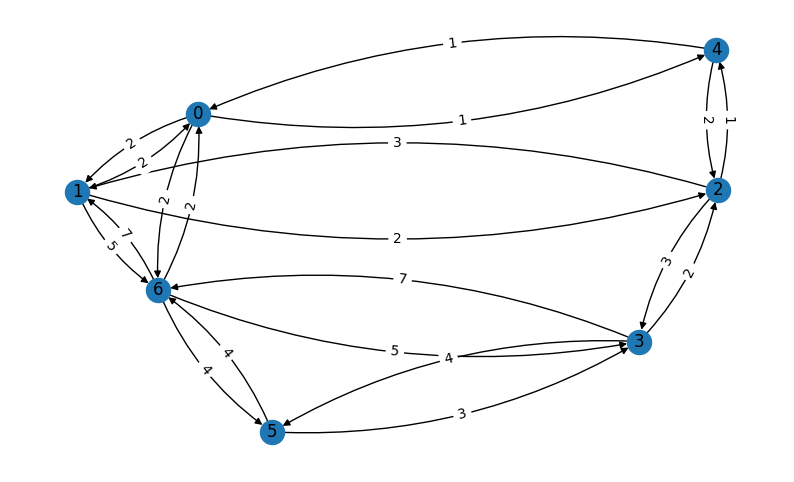

In [16]:
plt.figure(figsize=(10,6))
## inherit graph
example_tsp_directed = nx.DiGraph()
## update edge distance
example_tsp_directed.add_edges_from([
    (0,1,{'d':2}),    
    (0,4,{'d':1}),    
    (0,6,{'d':2}),    
    (1,2,{'d':2}),    
    (1,6,{'d':5}),    
    (2,3,{'d':3}),    
    (2,4,{'d':1}),    
    (3,5,{'d':4}),    
    (3,6,{'d':7}),    
    (5,6,{'d':4}),    
    (1,0,{'d':2}),
    (4,0,{'d':1}),
    (6,0,{'d':2}),
    (2,1,{'d':3}),
    (6,1,{'d':7}),
    (3,2,{'d':2}),
    (4,2,{'d':2}),
    (5,3,{'d':3}),
    (6,3,{'d':5}),
    (6,5,{'d':4})
])
## Need to create a layout when doing 
## separate calls to draw nodes and edges
pos = nx.spring_layout(example_tsp_directed, seed=7) ## seed=7
## draw nodes
nx.draw_networkx_nodes(example_tsp_directed, pos, node_size = 300)
## draw node labels
nx.draw_networkx_labels(example_tsp_directed, pos)
## draw edges
arc_rad = 0.15
# edge_list = [(u, v) for (u, v, d) in example_tsp_directed.edges(data=True)]
straight_edges = [edge for edge in example_tsp_directed.edges() if reversed(edge) not in example_tsp_directed.edges()] # straight_edges = list(set(G2.edges()) - set(curved_edges))
curved_edges = [edge for edge in example_tsp_directed.edges() if reversed(edge) in example_tsp_directed.edges()]
nx.draw_networkx_edges(example_tsp_directed, pos, edgelist = straight_edges)
nx.draw_networkx_edges(example_tsp_directed, pos, edgelist = curved_edges, connectionstyle=f'arc3, rad = {arc_rad}')
# edge distance labels
edge_labels = nx.get_edge_attributes(example_tsp_directed, "d")
straight_edge_labels = {edge: edge_labels[edge] for edge in straight_edges}
curved_edge_labels = {edge: edge_labels[edge] for edge in curved_edges}
nx.draw_networkx_edge_labels(example_tsp_directed, pos, edge_labels = straight_edge_labels)
# nx.draw_networkx_edge_labels(example_tsp_directed, pos, edge_labels = curved_edge_labels, label_pos=0.7)
my_draw_networkx_edge_labels(example_tsp_directed, pos, edge_labels = curved_edge_labels, rad = arc_rad)
# nx.draw_networkx_edge_labels(example_tsp_undirected, pos, edge_labels = edge_labels, label_pos=0.3, font_size=7)

for pos in ['right','top','bottom','left']:
    plt.gca().spines[pos].set_visible(False)
plt.show()

In [18]:
example_tsp_directed
for e in example_tsp_directed.edges():
    # example_tsp_directed[e[0]][e[1]]['d'] = np.random.randint(1,11)
    print(f'{e}, {example_tsp_directed[e[0]][e[1]]}')

(0, 1), {'d': 2}
(0, 4), {'d': 1}
(0, 6), {'d': 2}
(1, 2), {'d': 2}
(1, 6), {'d': 5}
(1, 0), {'d': 2}
(4, 0), {'d': 1}
(4, 2), {'d': 2}
(6, 0), {'d': 2}
(6, 1), {'d': 7}
(6, 3), {'d': 5}
(6, 5), {'d': 4}
(2, 3), {'d': 3}
(2, 4), {'d': 1}
(2, 1), {'d': 3}
(3, 5), {'d': 4}
(3, 6), {'d': 7}
(3, 2), {'d': 2}
(5, 6), {'d': 4}
(5, 3), {'d': 3}


In [12]:
example_tsp_directed.edges

OutEdgeView([(0, 1), (0, 2), (0, 3), (0, 4), (0, 6), (1, 0), (1, 2), (1, 3), (1, 4), (1, 6), (2, 0), (2, 1), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 4), (3, 5), (3, 6), (4, 0), (4, 1), (4, 2), (4, 3), (6, 0), (6, 1), (6, 3), (6, 5), (5, 3), (5, 6)])

In [17]:
# nx.write_gml(example_tsp_directed, "example_tsp_directed.gml")
# mygraph = nx.read_gml("example_tsp_directed.gml")

In [ ]:
# nx.write_gml(G, "path.to.file")
# mygraph = nx.read_gml("path.to.file")